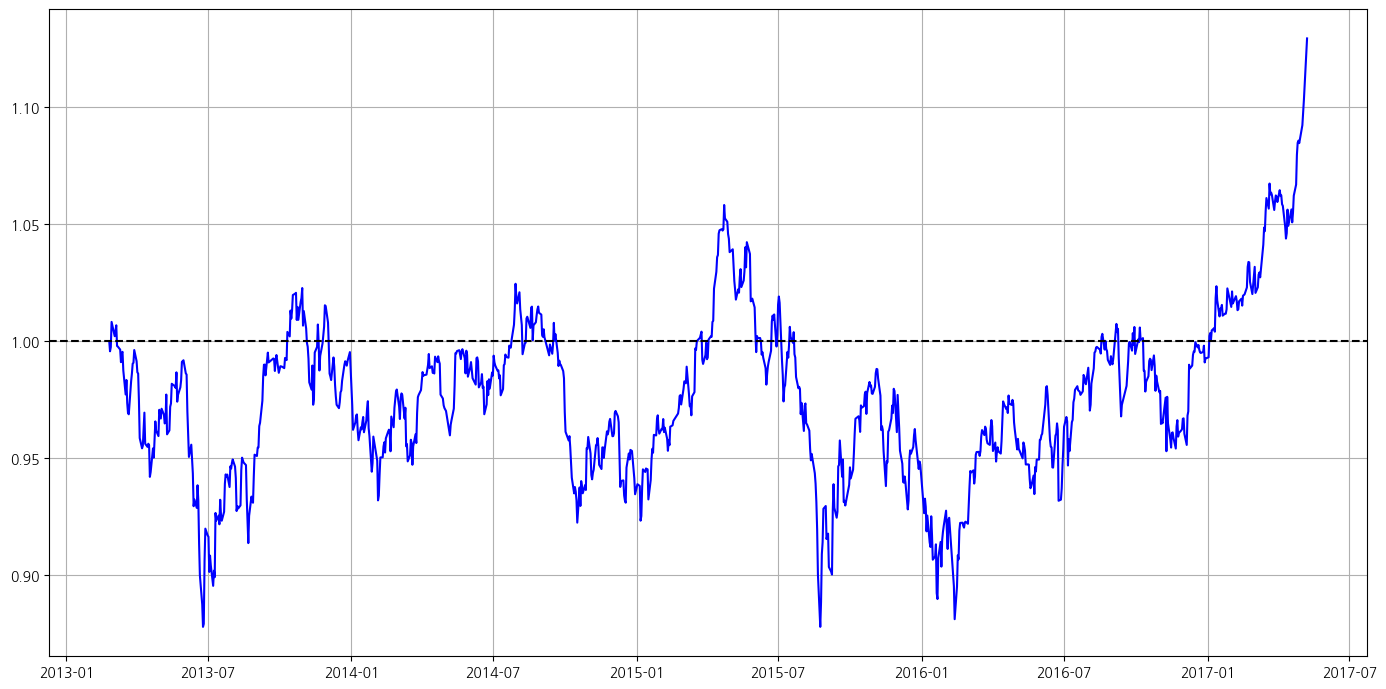

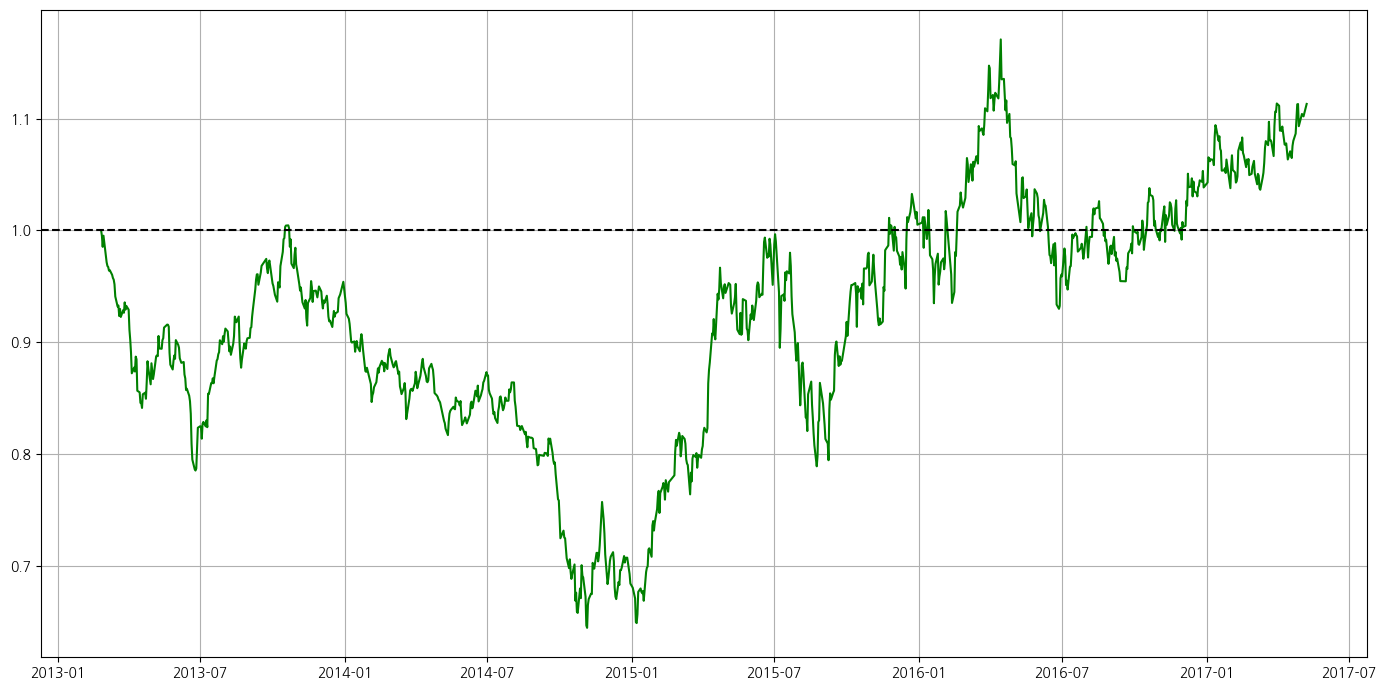

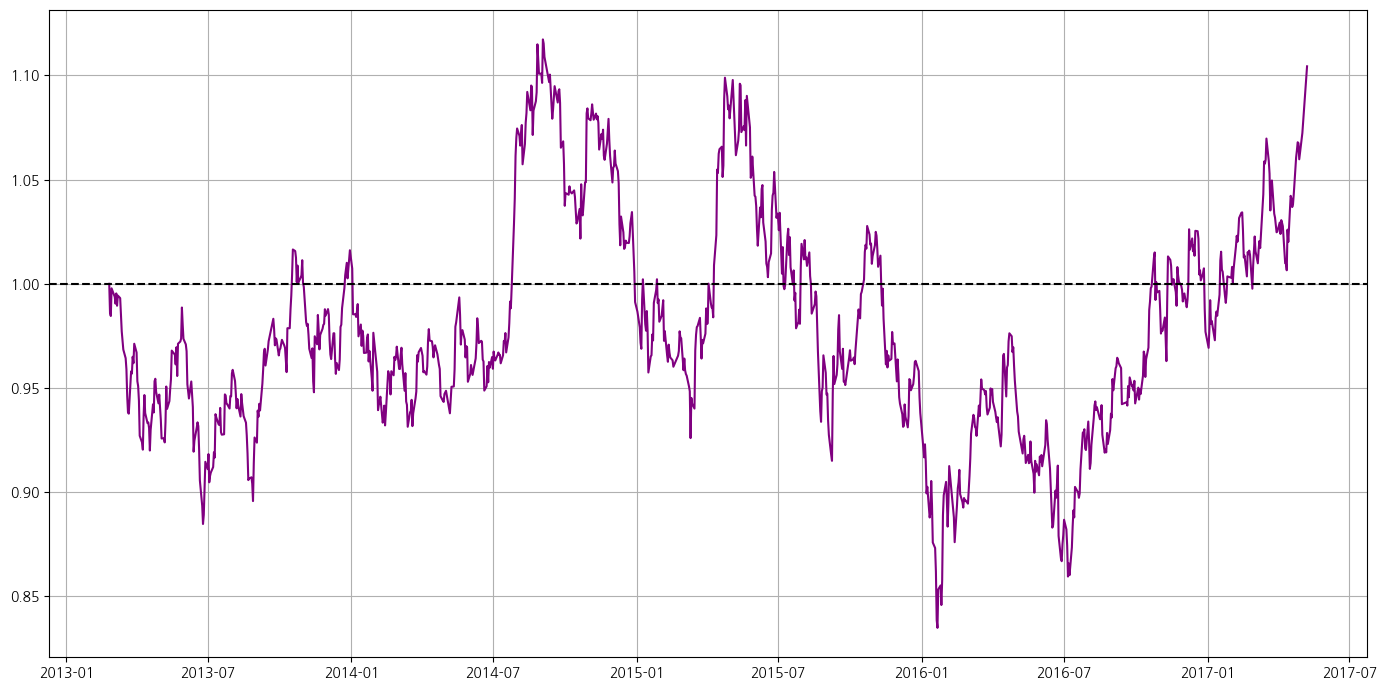

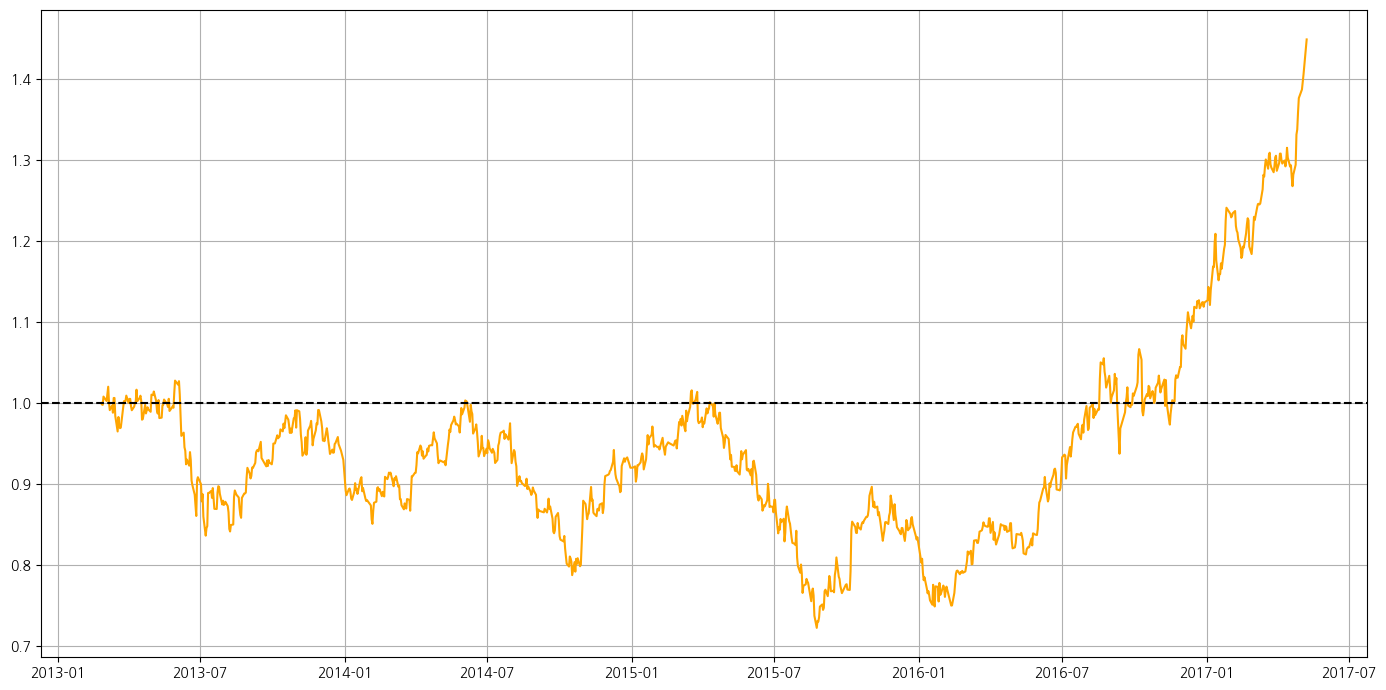

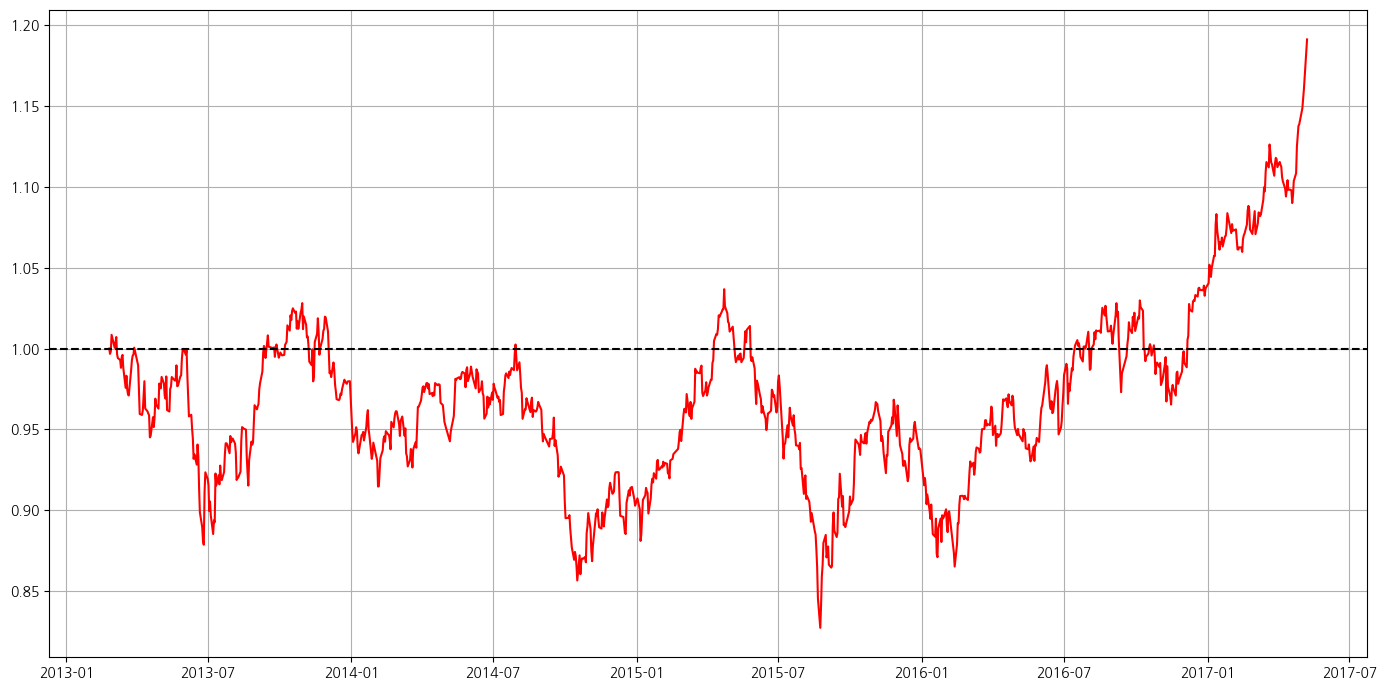

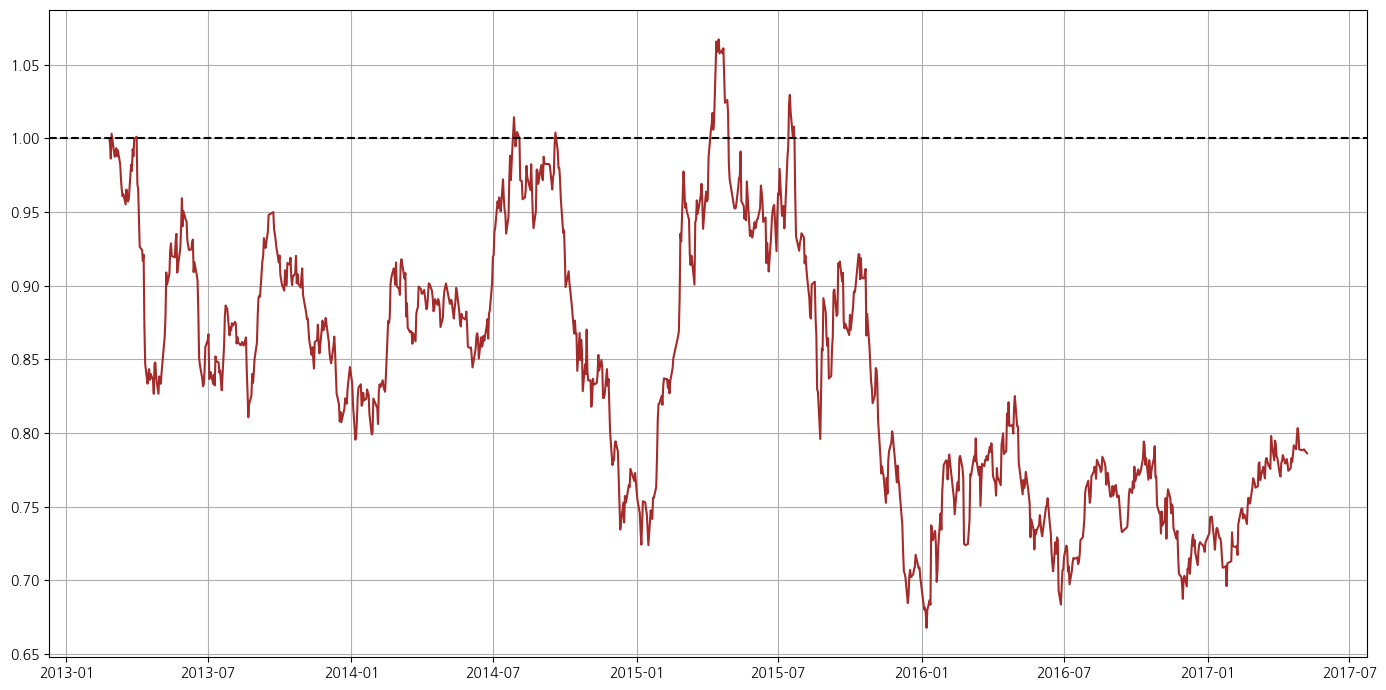

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

def load_and_prepare(csv_paths):
    dfs = [pd.read_csv(path, encoding='euc-kr') for path in csv_paths]
    df = pd.concat(dfs, ignore_index=True)
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.sort_values(by='일자')
    return df

datasets = {
    'KOSPI': [
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI3.csv"
    ],
    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
     '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
}

colors = ['blue', 'green', 'purple', 'orange', 'red', 'brown']

for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]

    plt.figure(figsize=(14, 7))
    plt.plot(df['일자'], df['정규화종가'], label="", color=colors[i % len(colors)])

    plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)
    # plt.title(f'{sector_name} 정규화 종가 추이')
    # plt.xlabel("")
    # plt.ylabel("")
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()

    save_path = f'/home/taemin/dev_ws/EDA/src/project/p_compare_{sector_name}.png'
    plt.savefig(save_path)
    # plt.close()  # 그래프 닫아주기 (중첩 방지)


[저장 완료] /mnt/data/Sheet1_종가_그래프.png


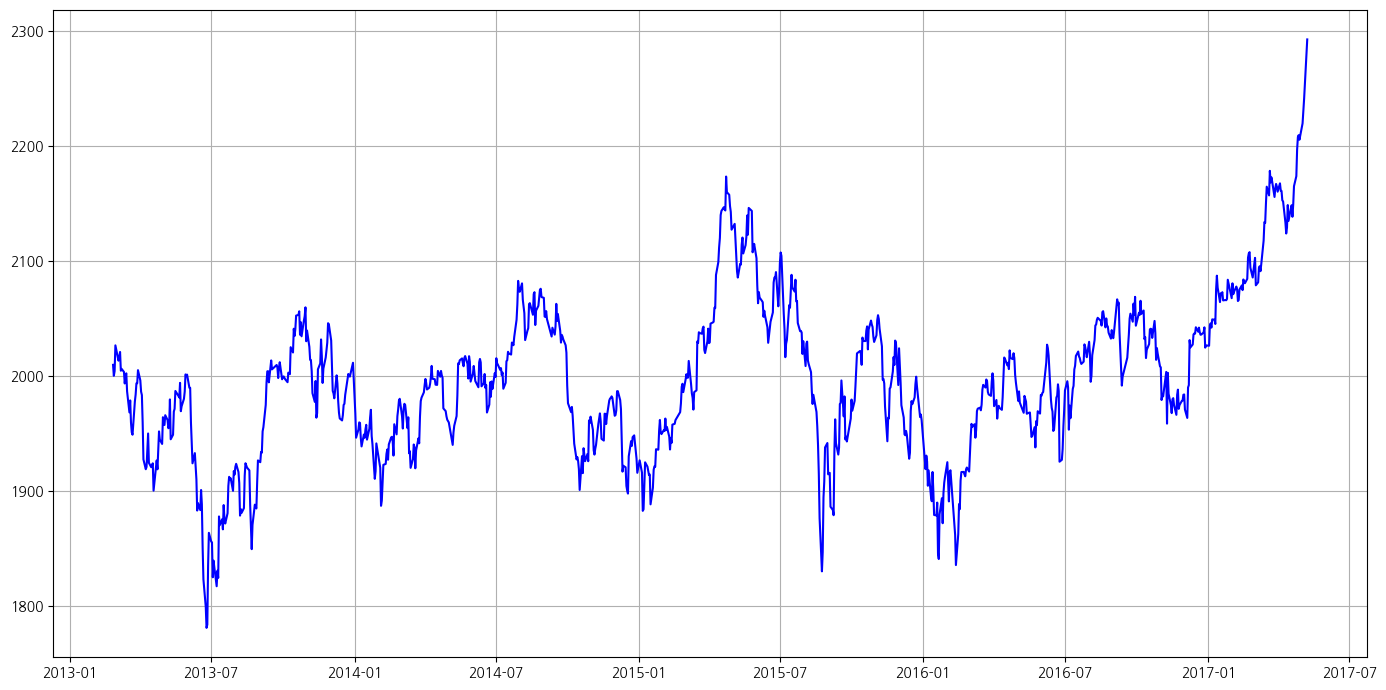

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 엑셀 파일 경로
excel_path = "/home/taemin/Downloads/2013.xlsx"

# 엑셀 파일 열기
excel = pd.ExcelFile(excel_path)

for sheet_name in excel.sheet_names:
    df = excel.parse(sheet_name)
    
    # 필요한 컬럼만 필터 (파일 구조에 맞게 수정)
    if '일자' not in df.columns or '종가' not in df.columns:
        print(f"[스킵] '{sheet_name}' 시트에는 '일자' 또는 '종가' 컬럼이 없습니다.")
        continue

    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.dropna(subset=['일자', '종가']).sort_values(by='일자')

    plt.figure(figsize=(14, 7))

    # 모든 시트에서 정규화 없이 종가 그대로 사용
    plt.plot(df['일자'], df['종가'], label=sheet_name, color='blue')
    
    # plt.title(f"{sheet_name} 종가 추이")
    # plt.xlabel("일자")
    # plt.ylabel("종가")
    # plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # 저장 파일명은 종가 포함해서 생성
    save_filename = f"/mnt/data/{sheet_name}_종가_그래프.png"
    # plt.savefig(save_filename)
    print(f"[저장 완료] {save_filename}")

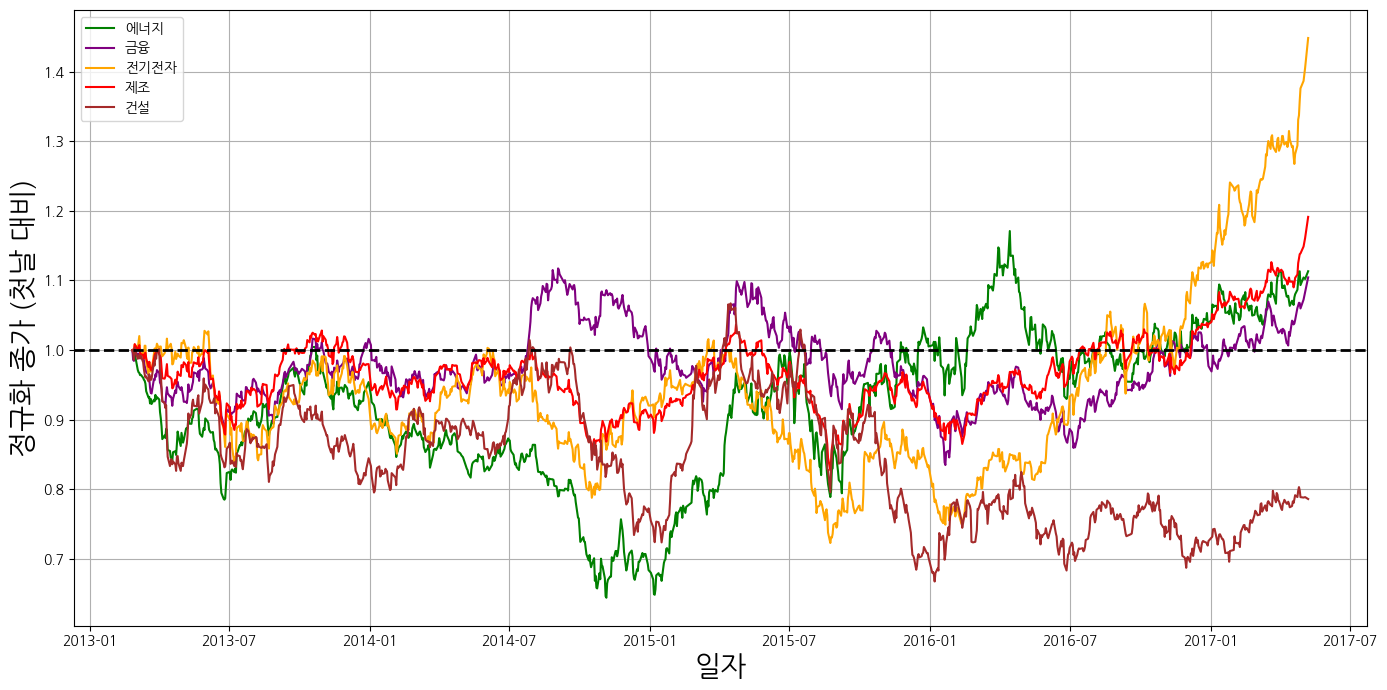

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
def load_and_prepare(csv_paths):
    dfs = []
    for path in csv_paths:
        dfs.append(pd.read_csv(path, encoding='euc-kr'))
    df = pd.concat(dfs, ignore_index=True)
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.sort_values(by='일자')
    return df
# 데이터셋 정의
datasets = {

    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
     '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
}
# 색상 리스트
colors = [ 'green', 'purple', 'orange', 'red', 'brown']
plt.figure(figsize=(14, 7))
for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    # 종가를 정규화해서 격차 줄이기 (선택사항)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    plt.plot(df['일자'], df['정규화종가'], label=sector_name, color=colors[i])
#plt.title('문재인 정부 기간 주요 산업군 종가 비교 (정규화)')
plt.xlabel('일자', fontsize='20')
plt.ylabel('정규화 종가 (첫날 대비)',fontsize='20')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.tight_layout()
plt.axhline(y=1, color='black', linestyle='--', linewidth=2)
#plt.savefig('/home/lim/dev_ws/EDA/data/compare_all.png')

In [3]:
df_2013 = pd.read_csv("/home/taemin/dev_ws/EDA/data/pdata/2013.csv", encoding='utf-8')
print(df_2013.dtypes)

일자         object
종가        float64
대비        float64
등락률       float64
시가        float64
고가        float64
저가        float64
거래량         int64
거래대금        int64
상장시가총액      int64
dtype: object


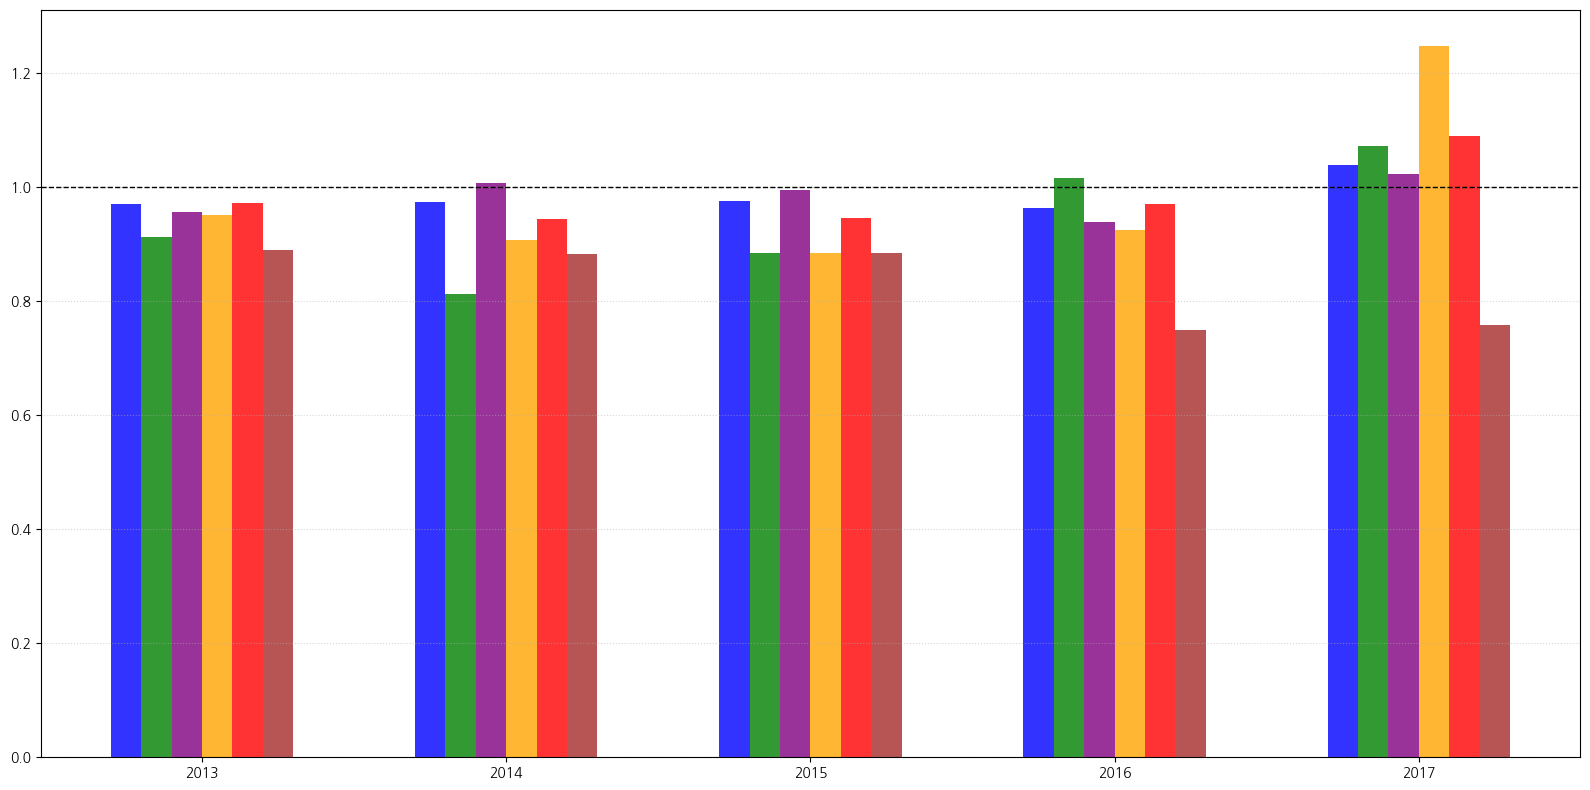

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 연도별 평균 정규화 종가 저장용 딕셔너리
yearly_avg_values = {}

for i, (sector_name, paths) in enumerate(datasets.items()):
    df = load_and_prepare(paths)
    df['정규화종가'] = df['종가'] / df['종가'].iloc[0]
    
    df['연도'] = df['일자'].dt.year
    yearly_avg = df.groupby('연도')['정규화종가'].mean()
    yearly_avg_values[sector_name] = yearly_avg

# 연도 전체 범위 계산
all_years = sorted(set().union(*(avg.index for avg in yearly_avg_values.values())))

x = np.arange(len(all_years))  # 연도별 x좌표 위치
bar_width = 0.1               # 막대 너비

plt.figure(figsize=(16, 8))

# 각 산업군별로 바(bar) 그리기
for i, (sector, yearly_avg) in enumerate(yearly_avg_values.items()):
    # 연도별 데이터가 없을 수도 있어 all_years 기준으로 NaN 보간
    yearly_data = yearly_avg.reindex(all_years, fill_value=np.nan)
    plt.bar(x + i * bar_width, yearly_data, width=bar_width, label=sector, color=colors[i % len(colors)], alpha=0.8)

# x축 연도 라벨 설정
plt.xticks(x + (bar_width * (len(yearly_avg_values) - 1) / 2), all_years)

plt.axhline(y=1, color='black', linestyle='--', linewidth=1)
# plt.title('박근혜 정부 기간 산업군별 연도별 평균 정규화 종가 비교')
# plt.xlabel() # 연도
# plt.ylabel() # 평균 정규화 종가
# plt.legend()
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.savefig('/home/taemin/dev_ws/EDA/src/project/p_compare3.png')




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
def load_and_prepare(csv_paths):
    dfs = [pd.read_csv(path, encoding='euc-kr') for path in csv_paths]
    df = pd.concat(dfs, ignore_index=True)
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    df = df.sort_values(by='일자')
    return df
# 파일 불러오기
datasets = {
    'KOSPI': [
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI3.csv"
        ],
    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ]
}

# 정규화
datasets['정규화종가'] = datasets['종가'] / df_kospi['종가'].iloc[0]
# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(df_kospi['일자'], df_kospi['정규화종가'], color='red') # 컬러 수정
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.axhline(y=1, color='black', linestyle='--', linewidth=1.5)
plt.savefig('/home/addinedu/eda_ws/data/fi_only.png')  # 파일 저장 (경로 및 파일 이름)
plt.show()  # 화면에 출력




KeyError: '종가'

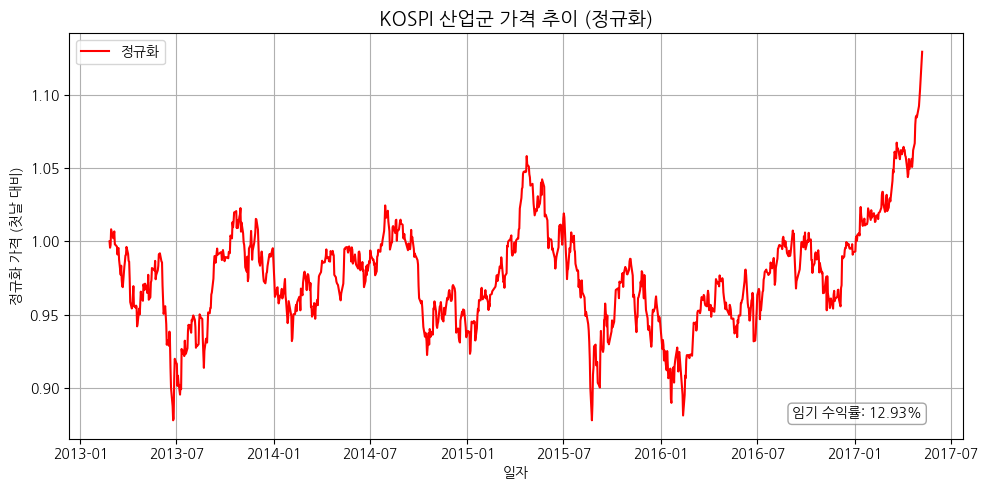

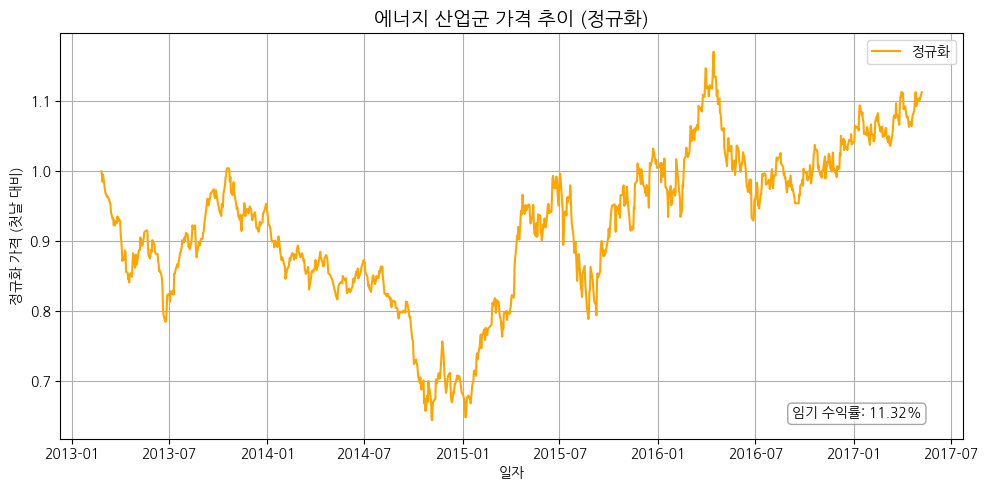

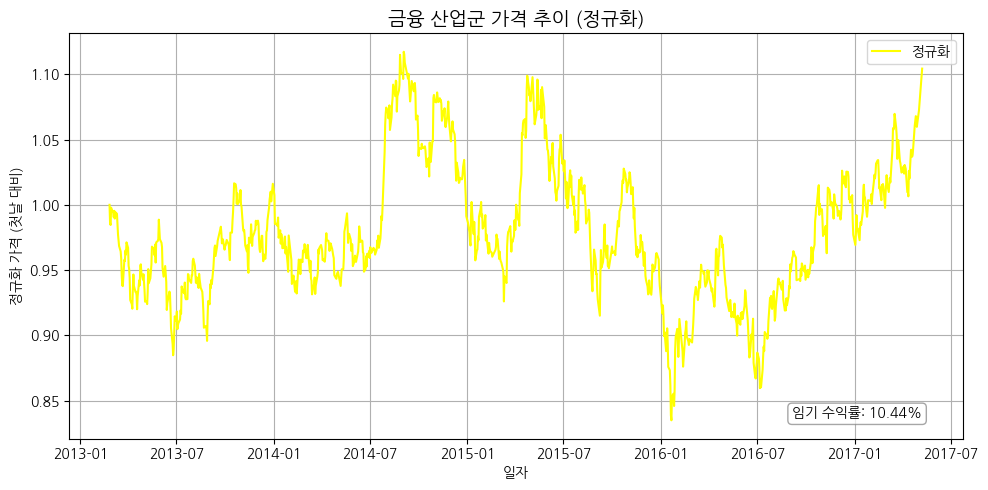

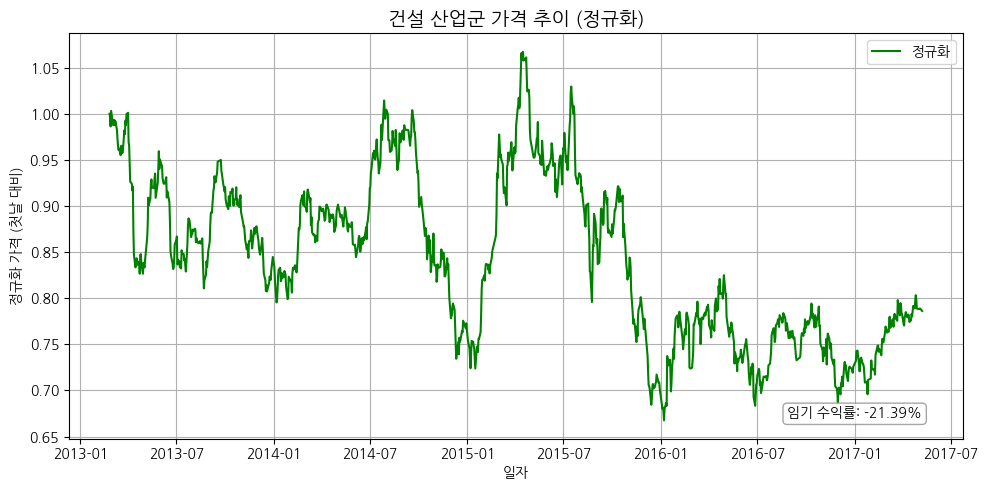

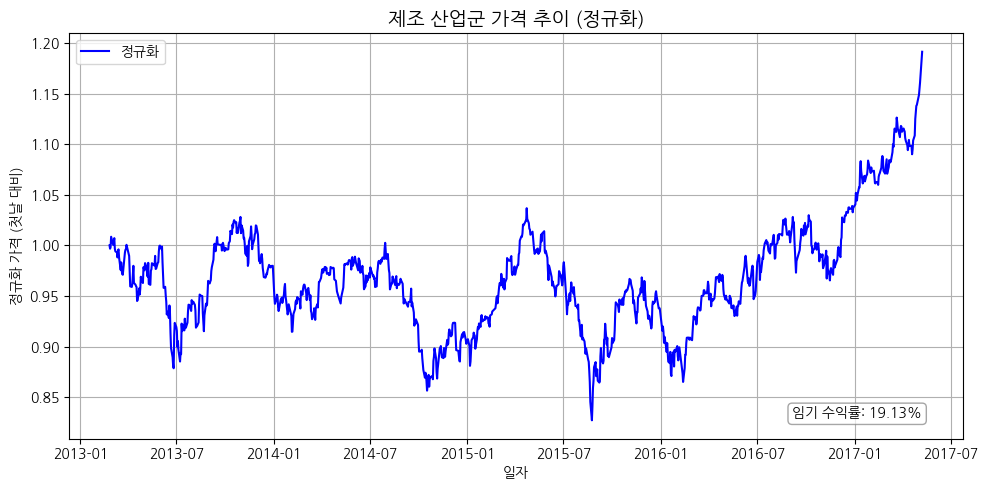

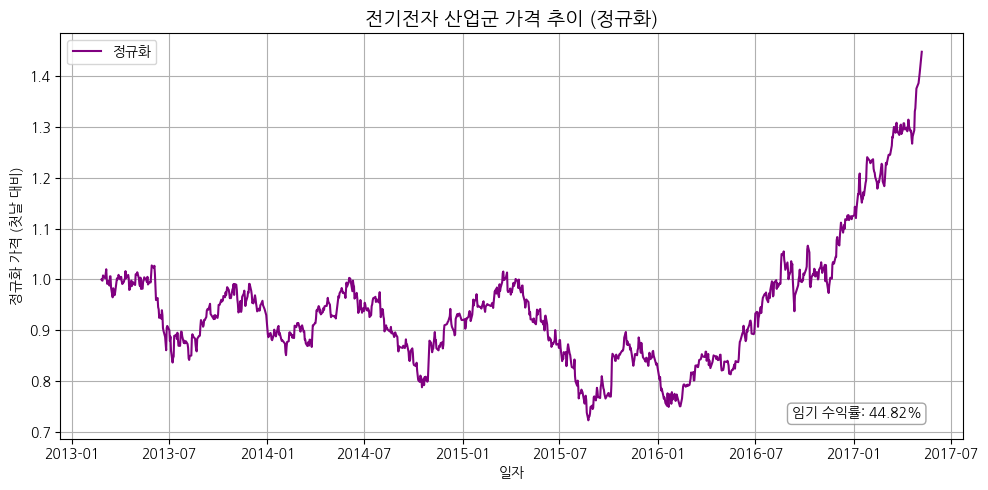

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib  # 한글 폰트 설정
# 데이터 불러오기 및 전처리 함수
def load_and_prepare(csv_paths, header=None):
    dfs = []
    for path in csv_paths:
        dfs.append(pd.read_csv(path, encoding='euc-kr'))
    df = pd.concat(dfs, ignore_index=True)
    # MultiIndex 헤더가 있으면 평탄화
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = [' '.join(col).strip() for col in df.columns]
    df['일자'] = pd.to_datetime(df['일자'], errors='coerce')
    return df.sort_values(by='일자')
# 섹터별 데이터 경로 정의
datasets = {
    'KOSPI': [
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/KOSPI/p_KOSPI3.csv"
        ],
    '에너지': [
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/energy/p_energy3.csv"
    ],
    '금융': [
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/finance/p_finance3.csv"
    ],
    '건설': [
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/construction/p_construction3.csv"
    ],
    '제조': [
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/manufacturing/p_manufacturing3.csv"
    ],
    '전기전자': [
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics1.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics2.csv",
        "/home/taemin/dev_ws/EDA/data/pdata/electronics/p_electronics3.csv"
    ]
}
# 색상 순서: 빨주노초파남 + 금·휘발유 색
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gold', 'brown']
# 섹터별 개별 그래프 생성 (정규화 + 60/120일 이동평균)
for i, (sector_name, paths) in enumerate(datasets.items()):
    # 1) 데이터 로드
    df = load_and_prepare(paths, header=0)
    # 2) 가격 컬럼 자동 탐색
    if sector_name == '휘발유':
        oil_cols = [c for c in df.columns if '협' in c]
        price_col = oil_cols[0] if oil_cols else df.columns[1]
        # 3) 휘발유에서 500 미만인 날 제거
        df = df[df[price_col] >= 500]
    else:
        price_col = '종가'
    # 4) 정규화 및 이동평균 계산
    df['정규화'] = df[price_col] / df[price_col].iloc[0]
    df['MA60']   = df['정규화'].rolling(window=60,  min_periods=1).mean()
    df['MA120']  = df['정규화'].rolling(window=120, min_periods=1).mean()
    # 5) 차트 그리기
    plt.figure(figsize=(10, 5))
    plt.plot(df['일자'], df['정규화'], color=colors[i], linestyle='-',  label='정규화')
    # plt.plot(df['일자'], df['MA60'],   color=colors[i], linestyle='--', label='60일 이동평균')
    # plt.plot(df['일자'], df['MA120'],  color=colors[i], linestyle=':',  label='120일 이동평균')
    plt.title(f'{sector_name} 산업군 가격 추이 (정규화)', fontsize=14)
    plt.xlabel('일자')
    plt.ylabel('정규화 가격 (첫날 대비)')
    plt.grid(True)
    plt.legend()
    # 6) 임기 수익률 계산 및 텍스트로 표시
    rate = df['정규화'].iloc[-1] / df['정규화'].iloc[0] - 1
    rate_percent = f"{rate * 100:.2f}%"
    label = f"임기 수익률: {rate_percent}"
    plt.text(
        df['일자'].iloc[-1],                 # x: 마지막 날짜
        df['정규화'].min(),                 # y: 최소값 기준
        label,
        fontsize=10,
        ha='right',
        va='bottom',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.7)
    )
    plt.tight_layout()
    plt.show()

Text(0, 0.5, '금액 (원)')

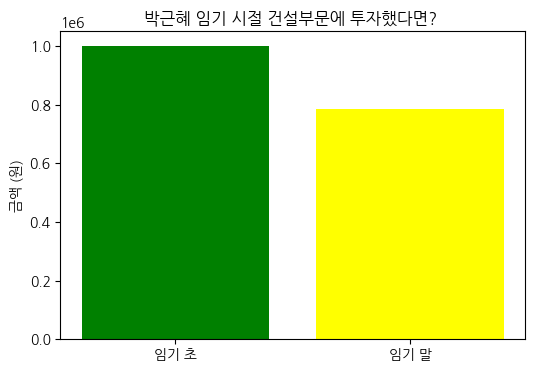

In [27]:
import matplotlib.pyplot as plt

# 인풋: 투자금과 수익률 (수익률은 변동 가능)
investment = 1_000_000  # 100만원
return_percent = -21.39    # 예: -수익률 (변경 가능)

# 아웃풋: 평가금액 계산
final_amount = investment * (1 + return_percent / 100)


# 시각화: as-is / to-be 막대 차트
labels = ['임기 초', '임기 말']
values = [investment, final_amount]
colors = ['green', 'yellow']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
plt.title("박근혜 임기 시절 건설부문에 투자했다면? ")  ## 수정
plt.ylabel("금액 (원)")

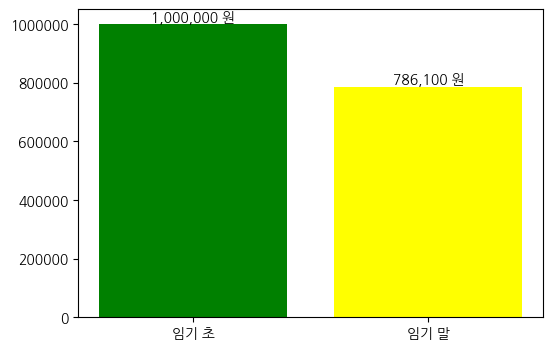

In [59]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

investment = 1_000_000
return_percent = -21.39
final_amount = investment * (1 + return_percent / 100)

labels = ['임기 초', '임기 말']
values = [investment, final_amount]
colors = ['green', 'yellow']

plt.figure(figsize=(6, 4))
bars = plt.bar(labels, values, color=colors)
# plt.title("박근혜 임기 시절 건설부문에 투자했다면? ")
# plt.ylabel("금액 (원)")

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

# 막대 위에 금액 표시 (단위 천 단위로 콤마 포함해서 표시)
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,  # 막대 중앙 x좌표
        height,                            # 막대 높이 y좌표
        f'{int(height):,} 원',             # 천 단위 콤마와 "원" 붙이기
        ha='center',                      # 중앙 정렬
        va='bottom',                      # 막대 위에 붙이기
        fontsize=10,
        color='black'
    )

plt.show()


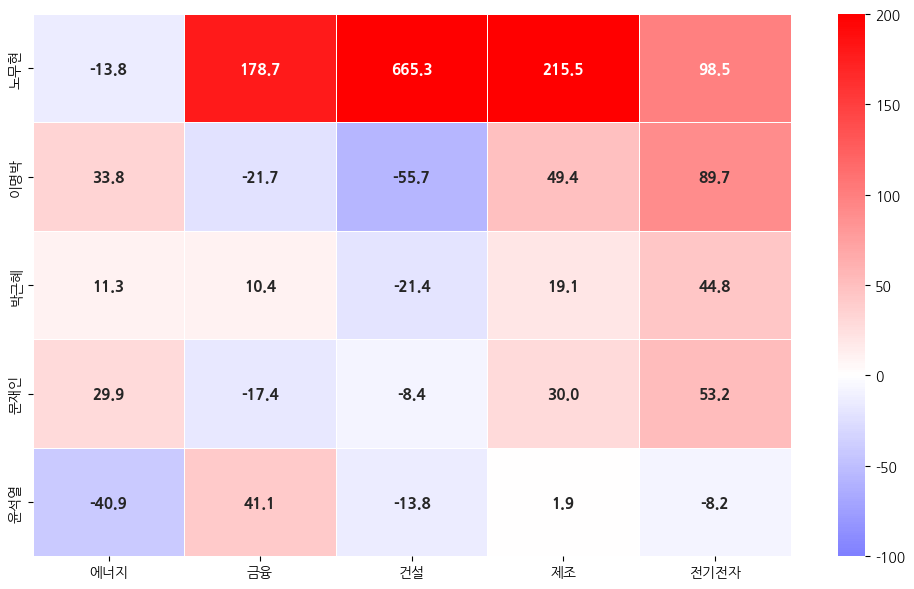

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from matplotlib.colors import LinearSegmentedColormap
# 사용자 정의 컬러맵 (−: 파랑 / ＋: 빨강)
custom_cmap = LinearSegmentedColormap.from_list("custom", ["blue", "white", "red"])
# 데이터
data = {
    '에너지': [-13.85, 33.82, 11.32, 29.85, -40.94],
    '금융': [178.72, -21.71, 10.44, -17.37, 41.07],
    '건설': [665.29, -55.7, -21.39, -8.41, -13.8],
    '제조': [215.5, 49.44, 19.13, 29.99, 1.95],
    '전기전자': [98.47, 89.69, 44.82, 53.23, -8.17],
}
index = ['노무현', '이명박', '박근혜', '문재인', '윤석열']
df = pd.DataFrame(data, index=index)
# 히트맵 그리기
plt.figure(figsize=(10, 6))
sns.heatmap(
    df,
    annot=True,
    fmt=".1f",
    cmap=custom_cmap,                      # + 빨강 / - 파랑
    center=0,
    linewidths=.5,
    cbar=True,
    vmin=-100, vmax=200,
    annot_kws={"size": 11, "weight": "bold"}  # 숫자 크기+굵기
)
# plt.title("정권별 업종 수익률 히트맵 ( -: 파랑    +: 빨강 )")
# plt.ylabel("대통령")
# plt.xlabel("업종")
plt.tight_layout()
plt.show()